# Coffee Sales Analysis

![coffee_image](../assets/coffee-image.jpeg "alt-coffee_image")

## About Author

Author: Joshua Farara

Project: title

### Contact Info
Click on link below to contact/follow/correct me:

Email: joshua.farara@gmail.com

[LinkedIn](https://www.linkedin.com/in/joshuafarara/)

[Facebook](https://www.facebook.com/josh.farara/)

[Twitter](https://x.com/FararaTheArtist)

[Github](https://github.com/JoshuaFarara)


## About Data

Title: Dataset Title

Dataset: [Link](https://www.kaggle.com/datasets/ihelon/coffee-sales/data)

Description of data:

This dataset contains detailed records of coffee sales from a vending machine. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products. The dataset spans from March 2024 to June 2024, capturing daily transaction data. And it's continue added new information.

### Dataset Columns Names

Features:


### Metadata

Source:

Collection Methodology:

License:



### Task

Describe task at hand for this dataset.

### Objectives

Describe objective at had for this dataset.

### Kernel Version Used

Python==3.11.7

## Import Libraries

We will use the following libraries¶
1. Pandas: Data manipulation and analysis
2. Numpy: Numerical operations and calculations
3. Matplotlib: Data visualization and plotting
4. Seaborn: Enhanced data visualization and statistical graphics
5. Scipy: Scientific computing and advanced mathematical operations

In [219]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Loading and Exploration | Cleaning

### Load a CSV file then creating a dataframe

In [220]:
# Kaggle Notebook
# df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')


#Local Machine Notebook
df = pd.read_csv('../data/coffee_sales_data.csv')


### Set the option to show maximum columns

In [221]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

### Get a sneak peek of data
The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest

In [222]:
df.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


### Let's see the column names

In [223]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

### Let's have a look on the shape of the dataset

In [224]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 896, and columns are 6.


### Let's have a look on the columns and their data types using detailed info function

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


### Count the missing values

In [226]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

## Cleaning Set 1

* There are 896 rows, and 6 columns in the dataset.

* The data type of all columns are objects except for df['money'] which is float.

* The columns in the datasets are:
    * 'date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'
    
* There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

* rename columns 'cash_type':'payment_type','card':'card_number', 'money':'amount_paid_uah'

* datetime can be split into two columns and drop column time, because data already has a column that satisfies date.

* money column after renaming 'amount_paid_uah' can derive an exchanged USD column for later comparison and analysis




### Task:

Clean the data by changing column names 


1. Change column names to appropriate names matching the data.
2. 

## Changing column names 

Changed: cash_type to payment_type since cash and card payments are accepted

In [227]:
df.rename(columns={'cash_type':'payment_type', 'card':'card_number', 'money':'amount_paid_uah'}, inplace=True)

In [228]:
df.columns

Index(['date', 'datetime', 'payment_type', 'card_number', 'amount_paid_uah',
       'coffee_name'],
      dtype='object')

## Creating Time Column

In [229]:
df[['new_date', 'time']] =df['datetime'].str.split(' ', n=1, expand=True)
df = df.drop(['new_date', 'datetime'], axis=1)
# df = ['date', 'time', 'payment_type', 'card_number', 'amount_paid_usd', 'coffee_name']

In [230]:
# check the data
df.head()


,date,payment_type,card_number,amount_paid_uah,coffee_name,time
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626


In [231]:
df['time']

0      10:15:50.520
1      12:19:22.539
2      12:20:18.089
3      13:46:33.006
4      13:48:14.626
5      15:39:47.726
6      16:19:02.756
7      18:39:03.580
8      19:22:01.762
9      19:23:15.887
10     19:29:17.391
11     10:22:06.957
12     10:30:35.668
13     10:41:41.249
14     11:59:45.484
15     14:38:35.535
16     16:37:24.475
17     17:34:54.969
18     10:10:43.981
19     10:27:18.561
20     11:33:56.118
21     12:26:56.098
22     13:09:36.321
23     17:06:40.271
24     17:08:45.895
25     18:03:23.369
26     18:04:27.946
27     18:08:04.959
28     10:03:51.994
29     10:54:50.958
30     11:05:16.184
31     14:04:37.734
32     09:59:52.651
33     14:34:55.963
34     17:34:06.043
35     17:35:25.021
36     17:36:28.571
37     17:37:13.659
38     17:38:09.354
39     17:56:15.776
40     18:01:31.242
41     12:30:27.089
42     13:24:07.667
43     13:25:14.351
44     14:52:01.761
45     14:53:18.344
46     10:08:58.945
47     10:18:40.543
48     11:03:58.976
49     11:25:43.977


## Convert amount_paid_uah(formerly df['money']) to USD.

.024 USD  = 1 Ukrainian hryvnia

1 USD = 40.3317	Ukrainian hryvnia

In [232]:
UAH_to_USD = .024
df['amount_paid_usd'] = df['amount_paid_uah'] * UAH_to_USD

In [233]:
df.head(100)

,date,payment_type,card_number,amount_paid_uah,coffee_name,time,amount_paid_usd
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520,0.9288
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539,0.9288
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089,0.9288
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006,0.6936
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626,0.9288
5,2024-03-01,card,ANON-0000-0000-0005,33.8,Americano with Milk,15:39:47.726,0.8112
6,2024-03-01,card,ANON-0000-0000-0006,38.7,Hot Chocolate,16:19:02.756,0.9288
7,2024-03-01,card,ANON-0000-0000-0007,33.8,Americano with Milk,18:39:03.580,0.8112
8,2024-03-01,card,ANON-0000-0000-0008,38.7,Cocoa,19:22:01.762,0.9288
9,2024-03-01,card,ANON-0000-0000-0008,33.8,Americano with Milk,19:23:15.887,0.8112


## Analytical Questions



Product analysis:
1. Total Revenue

2. Total Sales per Coffee 

3. Average amount paid per cup 
 
4. Average amount paid per cup for each coffee type in UAH

5. Which coffee had the highest/lowest sales?


Dates and Time analysis:
3. Which coffee is sold in the morning, afternoon, evening?

4. Which coffee is sold most/least during the week/weekend?

5. Which dates have the highest sales?

6. What day's of the week do coffee sales occur the most?

7. What is the most frequent time of sales at this vending machine?

8. What are the sale amounts for the card numbers, frequency, total amount paid, coffee types?

9. Are there any holidays that cause a spike or decline in sales?

10. 

Consumer analysis:

11. What are the sale amounts for the card numbers, frequency, total amount paid, coffee types?

12. What is the ratio amongst card consumers and cash consumers?

13. Do cash consumers spend more then card counterparts?

Currency analysis:
14. What is the exchange rate between UAH and USD at the time of this data? Compared to the average?

15. 

### Product Analysis

#### Coffee Sales Report

In [234]:
df['coffee_name'] = df['coffee_name'].astype('str') 

In [235]:
df[['coffee_name', 'amount_paid_uah']]

,coffee_name,amount_paid_uah
0,Latte,38.70
1,Hot Chocolate,38.70
2,Hot Chocolate,38.70
3,Americano,28.90
4,Latte,38.70
5,Americano with Milk,33.80
6,Hot Chocolate,38.70
7,Americano with Milk,33.80
8,Cocoa,38.70
9,Americano with Milk,33.80


##### Plot total revenue

In [236]:
# 1. Total Revenue
total_revenue_uah = df['amount_paid_uah'].sum()
total_revenue_usd = df['amount_paid_usd'].sum()
print(f"Total Revenue (UAH): {total_revenue_uah}, Total Revenue (USD): {total_revenue_usd}")

Total Revenue (UAH): 30592.940000000002, Total Revenue (USD): 734.23056


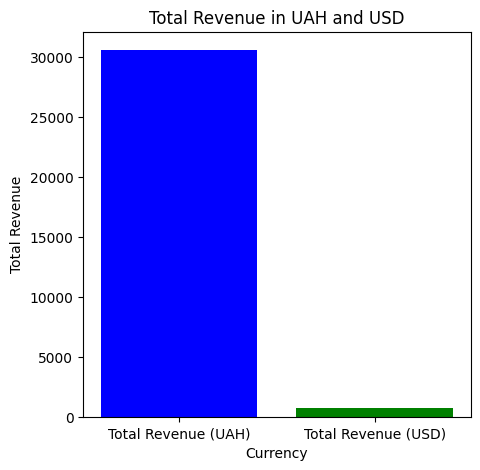

In [237]:
# Plot total revenue
plt.figure(figsize=(5, 5))
plt.bar(['Total Revenue (UAH)', 'Total Revenue (USD)'], [total_revenue_uah, total_revenue_usd], color=['blue', 'green'])
plt.xlabel('Currency')
plt.ylabel('Total Revenue')
plt.title('Total Revenue in UAH and USD')
plt.show()

In [238]:
# Group data by coffee_name
grouped_coffee = df.groupby('coffee_name')

In [239]:
# 3. Total Sales per Coffee Type in UAH
total_amount_paid_uah = grouped_coffee['amount_paid_uah'].sum()
print(total_amount_paid_uah)

coffee_name
Americano              3786.42
Americano with Milk    6738.14
Cappuccino             6253.50
Cocoa                   995.66
Cortado                2422.80
Espresso                827.34
Hot Chocolate          2417.46
Latte                  7151.62
Name: amount_paid_uah, dtype: float64


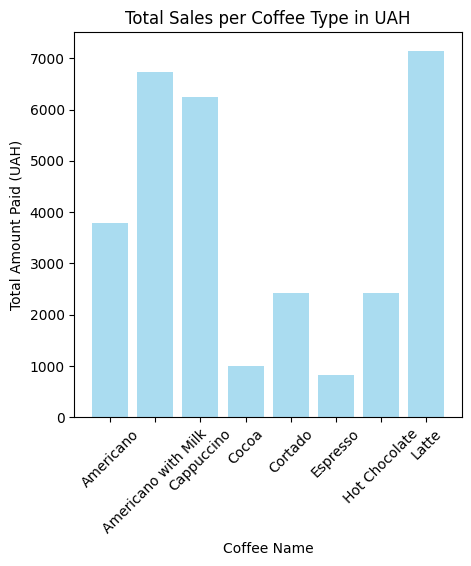

In [240]:
# Plot total sales per coffee type in UAH
plt.figure(figsize=(5, 5))
plt.bar(total_amount_paid_uah.index, total_amount_paid_uah, alpha=0.7, color='skyblue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Amount Paid (UAH)')
plt.title('Total Sales per Coffee Type in UAH')
plt.xticks(rotation=45)
plt.show()

##### Total Revenue by Coffee Name Avanced Plotting of 

In [241]:
# Group by coffee_name and calculate total revenue
total_revenue_uah_coffee = df.groupby('coffee_name')['amount_paid_uah'].sum()
total_revenue_usd_coffee = df.groupby('coffee_name')['amount_paid_usd'].sum()

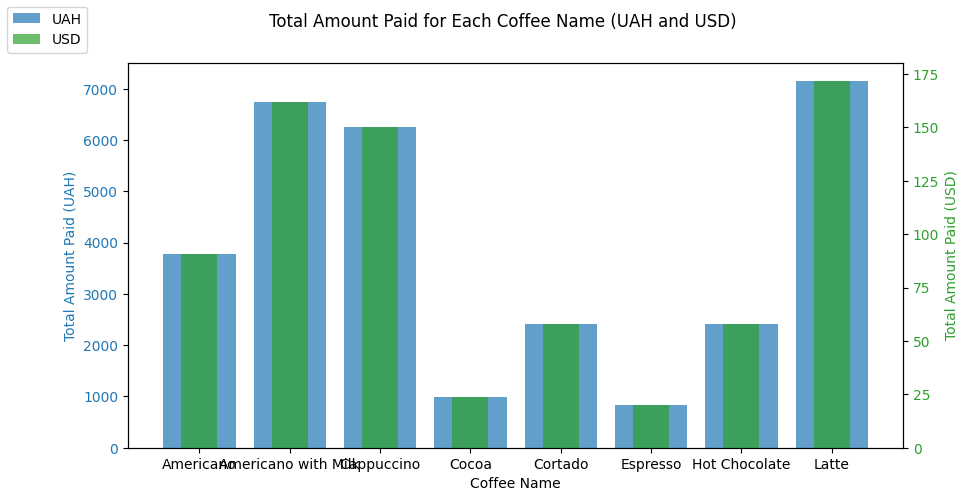

In [242]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot UAH data
color = 'tab:blue'
ax1.set_xlabel('Coffee Name')
ax1.set_ylabel('Total Amount Paid (UAH)', color=color)
bars1 = ax1.bar(total_revenue_uah_coffee.index, total_revenue_uah_coffee, alpha=0.7, label='UAH', color=color,  align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for USD data
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Amount Paid (USD)', color=color)
bars2 = ax2.bar(total_revenue_usd_coffee.index, total_revenue_usd_coffee, alpha=0.7, label='USD', color=color, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=45)

# Title and legend
fig.suptitle('Total Amount Paid for Each Coffee Name (UAH and USD)')
fig.legend([bars1, bars2], ['UAH', 'USD'], loc='upper left')


# Show plot
plt.show()

##### Average amount paid per cup

In [257]:
# Average amount paid per cup
df['amount_paid_uah'].mean()

np.float64(34.14390625)

##### Average Amount Paid by Coffee Name UAH and USD

In [258]:
# 2. Average Amount Paid per Cup in UAH and USD
average_amount_paid_uah = grouped_coffee['amount_paid_uah'].mean()
average_amount_paid_usd = grouped_coffee['amount_paid_usd'].mean()
print(average_amount_paid_uah)
print(average_amount_paid_usd)

coffee_name
Americano              28.469323
Americano with Milk    33.192808
Cappuccino             38.131098
Cocoa                  38.294615
Cortado                28.503529
Espresso               23.638286
Hot Chocolate          38.372381
Latte                  38.243957
Name: amount_paid_uah, dtype: float64
coffee_name
Americano              0.683264
Americano with Milk    0.796627
Cappuccino             0.915146
Cocoa                  0.919071
Cortado                0.684085
Espresso               0.567319
Hot Chocolate          0.920937
Latte                  0.917855
Name: amount_paid_usd, dtype: float64


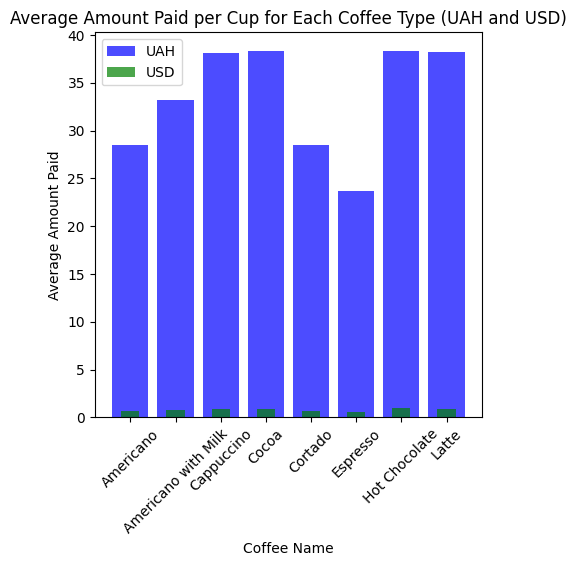

In [245]:
# Plot average amount paid per cup for each coffee type in UAH and USD
plt.figure(figsize=(5, 5))
plt.bar(average_amount_paid_uah.index, average_amount_paid_uah, alpha=0.7, label='UAH', color='blue')
plt.bar(average_amount_paid_usd.index, average_amount_paid_usd, alpha=0.7, label='USD', color='green', width=0.4)
plt.xlabel('Coffee Name')
plt.ylabel('Average Amount Paid')
plt.title('Average Amount Paid per Cup for Each Coffee Type (UAH and USD)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### Top Highest Revenue Earning Coffee Names

In [250]:
total_revenue_uah_coffee = df.groupby('coffee_name')['amount_paid_uah'].sum().reset_index()

In [251]:
total_revenue_sorted = total_revenue_uah_coffee.sort_values('amount_paid_uah', ascending=False)

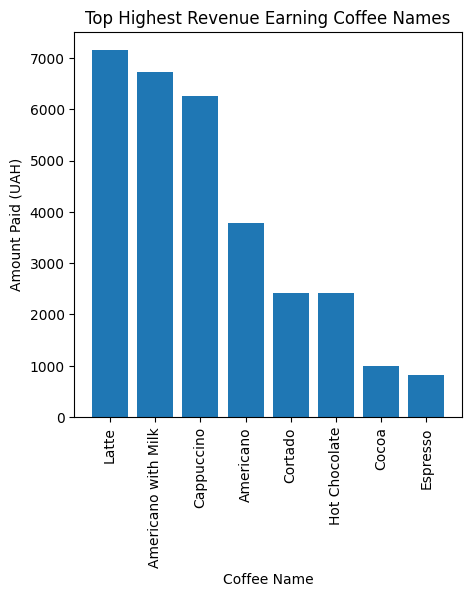

In [254]:
# Top Highest Revenue Earning Coffee Names
plt.figure(figsize=(5, 5))
plt.bar(total_revenue_sorted['coffee_name'], total_revenue_sorted['amount_paid_uah'])
plt.xlabel('Coffee Name')
plt.ylabel('Amount Paid (UAH)')
plt.xticks(rotation=90)
_ = plt.title('Top Highest Revenue Earning Coffee Names')
plt.show()


In [255]:
# Print highest and lowest revenue earning coffee
highest_revenue_coffee = total_revenue_sorted.iloc[0]  # First row for highest
lowest_revenue_coffee = total_revenue_sorted.iloc[-1]   # Last row for lowest

print(f"Highest Revenue Earning Coffee (UAH): {highest_revenue_coffee['coffee_name']} - Amount: {highest_revenue_coffee['amount_paid_uah']}")
print(f"Lowest Revenue Earning Coffee (UAH): {lowest_revenue_coffee['coffee_name']} - Amount: {lowest_revenue_coffee['amount_paid_uah']}")


Highest Revenue Earning Coffee (UAH): Latte - Amount: 7151.62
Lowest Revenue Earning Coffee (UAH): Espresso - Amount: 827.34
